<a href="https://colab.research.google.com/github/Adamantev/DataSet/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Исходные данные

In [17]:
N = 51                            # Размер сетки
N_eq = ((N - 2) * (N - 2))        # Кол-во уравнений
L1 = 1                            # Длина пластины
L2 = 1                            # Ширина пластины
x1 = np.linspace(0, L1, N)
x2 = np.linspace(0, L2, N)
dx1 = x1[1] - x1[0]
dx2 = x2[1] - x2[0]
# Коэффициенты уравнений
a = 1 / (dx1 ** 2);
b = 1 / (dx2 ** 2);
c = -2 * ((1 / (dx1 ** 2)) + (1 / (dx2 ** 2)))

# Инициализация матрицы коэффициентов и вектора известных

In [18]:
M = np.zeros((N_eq, N_eq))
K = np.zeros((N_eq))

# Начальные и граничные условия

In [19]:
# def fill_T(dT):
#     T.fill(0)
#     T[0, :] = 0                             # x1 = 0
#     T[:, 0] = 0                             # x2 = 0
#     T[-1, :] = ((A - C) * x2 / L2) + C + dT # x1 = L1
#     T[:, -1] = ((A - B) * x1 / L1) + B      # x2 = L2

# A=240 + 273
# B=350 + 273
# C=450 + 273

# T = np.zeros((N, N))

In [20]:
# def fill_T(dT):
#     T.fill(0)
#     # T[0, :] = ((A - B) * x1 / L1) + B                           # x1 = 0
#     T[0, :] = ((C - A) * x1 / L1) + A + dT                        # x1 = 0
#     T[:, 0] = 0                                                   # x2 = 0
#     T[-1, :] = ((B - A) * x2 / L2) + A + dT                       # x1 = L1
#     T[:, -1] = 0                                                  # x2 = L2

# A=200 + 273
# B=300 + 273
# C=400 + 273

# T = np.zeros((N, N))

In [21]:
def fill_T(dT):
    T.fill(0)
    T[0, :] = ((C - A) * x2 / L1) + A + dT                        # x1 = 0
    T[:, 0] = A                                                   # x2 = 0
    T[-1, :] = 0                                                  # x1 = L1
    T[:, -1] = 0                                                  # x2 = L2

A=350 + 273
B=0 + 273
C=500 + 273

T = np.zeros((N, N))

# Заполнение матрицы коэффициентов и вектора известных

In [22]:
def fill_K():
    K.fill(0)
    count = 0
    # Матрица известных
    for i in range(N - 2):
        for j in range(N - 2):
            if not i:
                # Заполнение известных при T(i, 0)
                K[count] += -T[i, j + 1] * a
            if not j:
                # Заполнение известных при T(0, j)
                K[count] += -T[i + 1, j] * b
            if i == N - 3:
                # Заполнение известных при T(i, L2)
                K[count] += -T[i + 2, j + 1] * a
            if j == N - 3:
                # Заполнение известных при T(L1, j)
                K[count] += -T[i + 1, j + 2] * b
            count += 1

# Матрица коэффициентов
for i in range(M.shape[1]):
    # Заполнение главной диагонали для T(i, о)
    M[i, i] = c
    if not i % (N - 2):
        # x2 = 0 ==> dT/dx2 = 0
        M[i, i] += b
    if i < N - 2:
        # x1 = 0 ==> dT/dx1 = 0
        M[i, i] += a
    if i < M.shape[1] - 1:
        if (i + 1) % (N - 2):
            # Заполнение диагонали для T(i, j - 1)
            M[i + 1, i] = b
            # Заполнение диагонали для T(i, j + 1)
            M[i, i + 1] = b
    if i < M.shape[1] - N + 2:
        # Заполнение диагонали для T(i - 1, j)
        M[i  + N - 2, i] = a
    if i < M.shape[1] - N + 2:
        # Заполнение диагонали для T(i + 1, j)
        M[i, i  + N - 2] = a

# Расчет результирующего поля температур при dT = [0, 20, 40, 60, 80, 100] на T(L1, j)

dT = 0


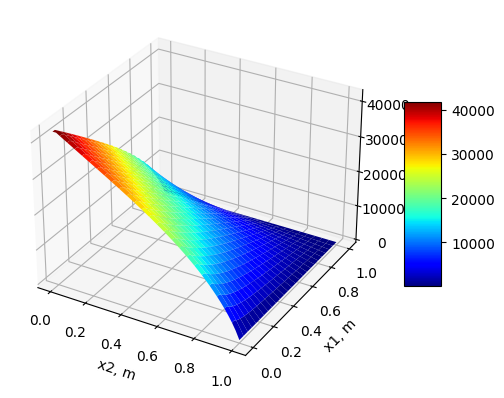

dT = 20


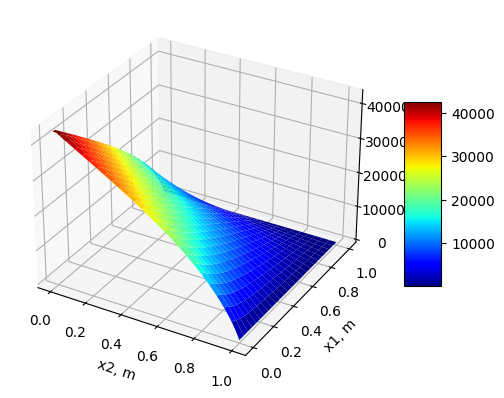

dT = 40


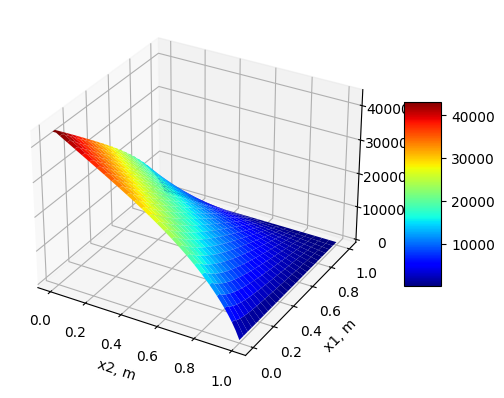

dT = 60


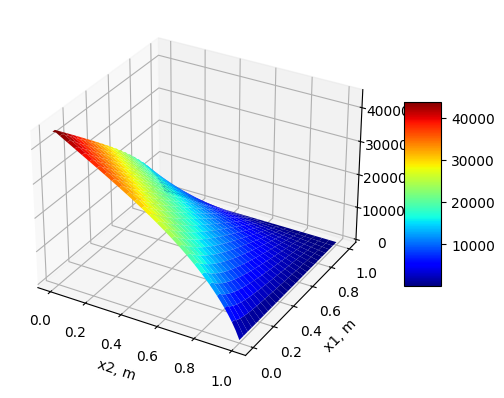

dT = 80


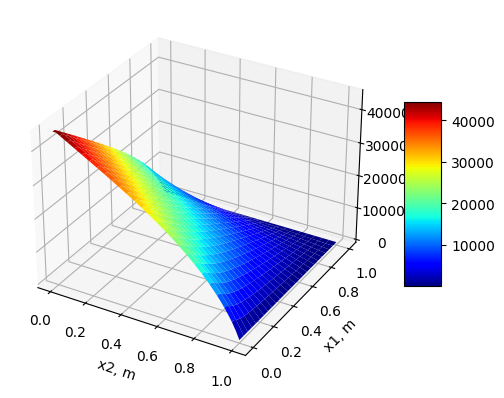

dT = 100


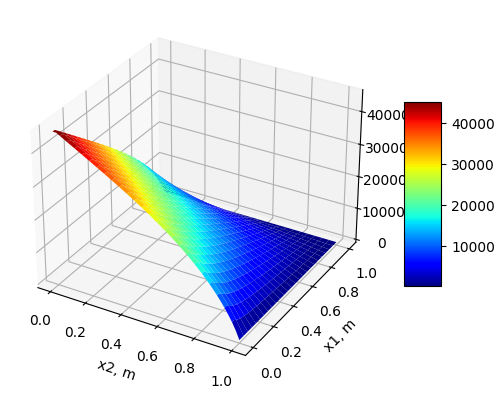

In [23]:
T_all = []

for dT in range(6):
    # Добавление dT на T(L1, j)
    if dT:
        fill_T(dT * 20)
    else:
        fill_T(0)

    # Матрица известных
    fill_K()

    # Решение СЛАУ
    T_result = np.linalg.solve(M, K)

    # Компоновка поля температур
    T[1:-1, 1:-1] = T_result.reshape(N-2, -1)
    T[0, :-1] = T[1, :-1]         # x1 = 0 ==> dT/dtx2 = 0
    T[:-1, 0] = T[:-1, 1]   # x2 = 0 ==> dT/dtx2 = 0
    T_all.append(T.copy())

    # Визуализация поля температур

    print(f'dT = {dT * 20}')

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    xx2, xx1 = np.meshgrid(x2, x2)
    surf = ax.plot_surface(xx2, xx1, T, cmap=cm.jet)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x2, m')
    plt.ylabel('x1, m')
    plt.show()

# Построение графиков

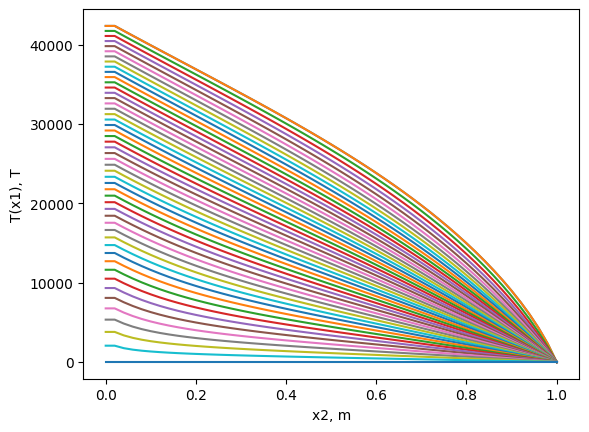

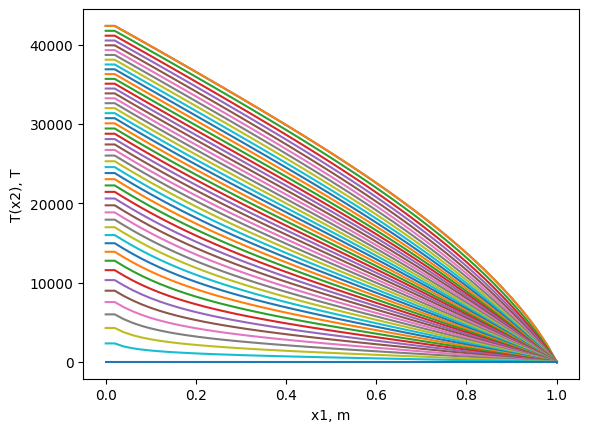

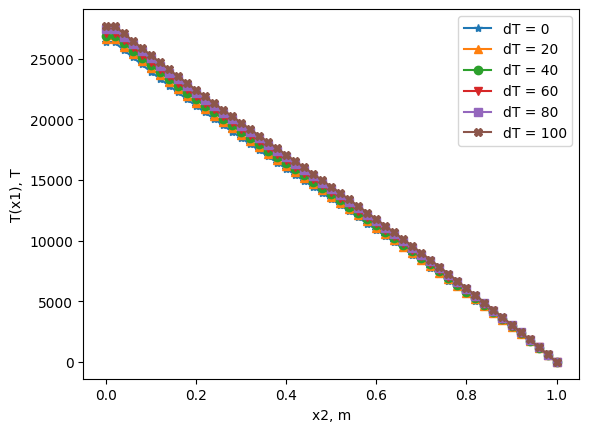

In [24]:
# Графики изменения температуры при dT = 0

plt.figure()
for i in range(N):
    plt.plot(x2, T_all[0][i, :])

plt.xlabel('x2, m')
plt.ylabel('T(x1), T')
plt.show()

plt.figure()
for i in range(N):
    plt.plot(x1, T_all[0][:, i])

plt.xlabel('x1, m')
plt.ylabel('T(x2), T')
plt.show()

# Графики изменения температуры при dT = 0

plt.figure()
markers = ['*', '^', 'o', 'v', 's', 'X']
for i in range(6):
    plt.plot(x2, T_all[i][N // 2, :], marker = markers[i])
plt.xlabel('x2, m')
plt.ylabel('T(x1), T')
plt.legend(['dT = 0', 'dT = 20', 'dT = 40', 'dT = 60', 'dT = 80', 'dT = 100'])
plt.show()